<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/Js9_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muhammad Rafif Pasya(4.33.23.1.18)**

Dengan menggunakan pengetahuan tentang RNN dan LSTM pada bab ini, silakan susun Deep Neural Network sendiri untuk memprediksi pada dataset timeseries berikut:
https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
# Load dataset
df = pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
close_data = df["Close"].values.reshape(-1, 1)


In [16]:
# Normalisasi
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)

In [17]:


# Membuat dataset time series
def create_dataset(data, window_size=50):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_dataset(scaled_close, window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:

# Bentuk input
X_train = X_train.reshape((X_train.shape[0], window_size, 1))
X_test = X_test.reshape((X_test.shape[0], window_size, 1))

In [19]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer="adam", loss="mean_squared_error")
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0057 - val_loss: 8.3643e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 4.2342e-04 - val_loss: 4.5634e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1557e-04 - val_loss: 4.5525e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 4.0487e-04 - val_loss: 0.0013
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.6763e-04 - val_loss: 4.8970e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3.3099e-04 - val_loss: 3.5950e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 3.1828e-04 - val_loss: 6.5465e-04
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.8688e-04 - val_loss: 3.3915e-04
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.5475e-04 - val_loss: 6.2527e-04
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.7939e-04 - val_loss: 9.4916e-04


In [20]:
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(window_size, 1)),
    SimpleRNN(50),
    Dense(1)
])
model_rnn.compile(optimizer="adam", loss="mean_squared_error")
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0591 - val_loss: 0.0030
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3838e-04 - val_loss: 0.0029
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.8464e-04 - val_loss: 0.0015
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.2226e-04 - val_loss: 0.0012
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7691e-04 - val_loss: 0.0011
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8766e-04 - val_loss: 0.0012
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3629e-04 - val_loss: 0.0011
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 2.2125e-04 - val_loss: 9.4210e-04
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.8342e-04 - val_loss: 9.3071e-04
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.7140e-04 - val_loss: 8.3825e-04


In [21]:
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(window_size, 1)),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer="adam", loss="mean_squared_error")
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0215 - val_loss: 3.4550e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 1.8195e-04 - val_loss: 3.3286e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 1.9501e-04 - val_loss: 2.8422e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.6980e-04 - val_loss: 2.8751e-04
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.9293e-04 - val_loss: 1.9532e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 1.4953e-04 - val_loss: 2.2632e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 1.5019e-04 - val_loss: 2.6300e-04
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.3440e-04 - val_loss: 1.7897e-04
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 1.2318e-04 - val_loss: 1.8302e-04
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 1.2235e-04 - val_loss: 2.2397e-04


In [22]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer="adam", loss="mean_squared_error")
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0099 - val_loss: 0.0017
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0085e-04 - val_loss: 6.0708e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4273e-04 - val_loss: 4.5640e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5591e-04 - val_loss: 6.4404e-04
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9038e-04 - val_loss: 5.0456e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3697e-04 - val_loss: 4.5262e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0724e-04 - val_loss: 8.3355e-04
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9871e-04 - val_loss: 8.0172e-04
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5626e-04 - val_loss: 2.6377e-04
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0580e-04 - val_loss: 4.5632e-04


In [25]:
# Fungsi evaluasi model dengan pembulatan hasil
def evaluate_model(model, name):
    pred_scaled = model.predict(X_test)
    pred = scaler.inverse_transform(pred_scaled)
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_true, pred)
    mae = mean_absolute_error(y_true, pred)

    # Pembulatan hasil evaluasi
    return name, round(mse, 3), round(mae, 3)

# Evaluasi semua model
eval_results = []
for model, name in zip(
    [model_lstm, model_rnn, model_gru, model_cnn],
    ["LSTM", "RNN", "GRU", "CNN"]
):
    eval_results.append(evaluate_model(model, name))

# Menampilkan hasil
for result in eval_results:
    print(f"Model: {result[0]:<5} | MSE: {result[1]:<7} | MAE: {result[2]}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model: LSTM  | MSE: 3.885   | MAE: 1.595
Model: RNN   | MSE: 3.431   | MAE: 1.245
Model: GRU   | MSE: 0.917   | MAE: 0.719
Model: CNN   | MSE: 1.868   | MAE: 1.117


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


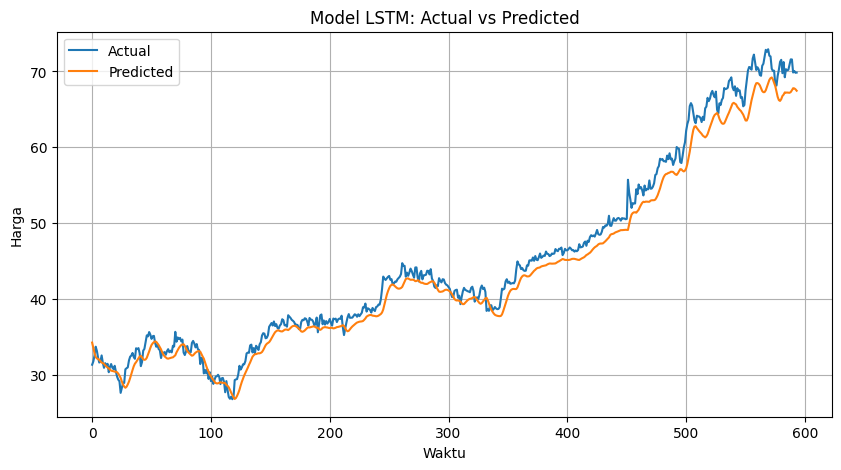

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


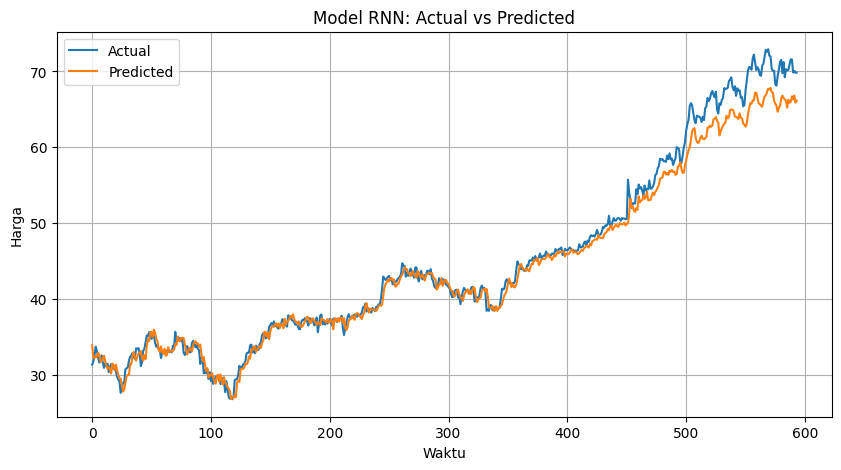

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


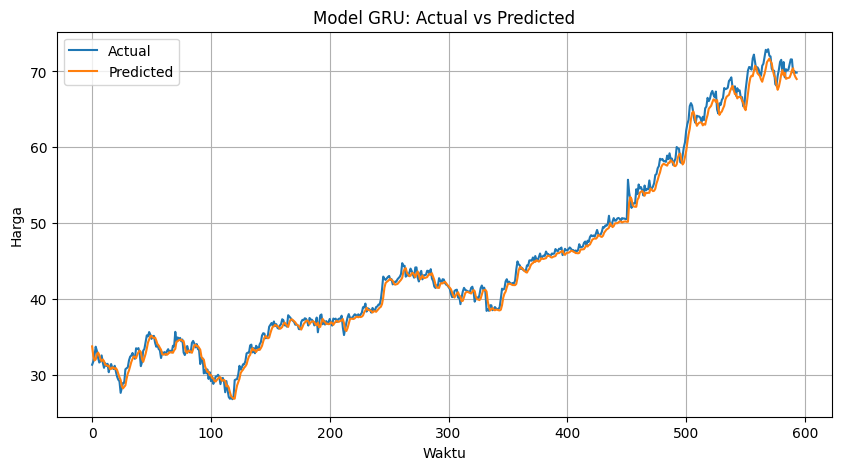

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


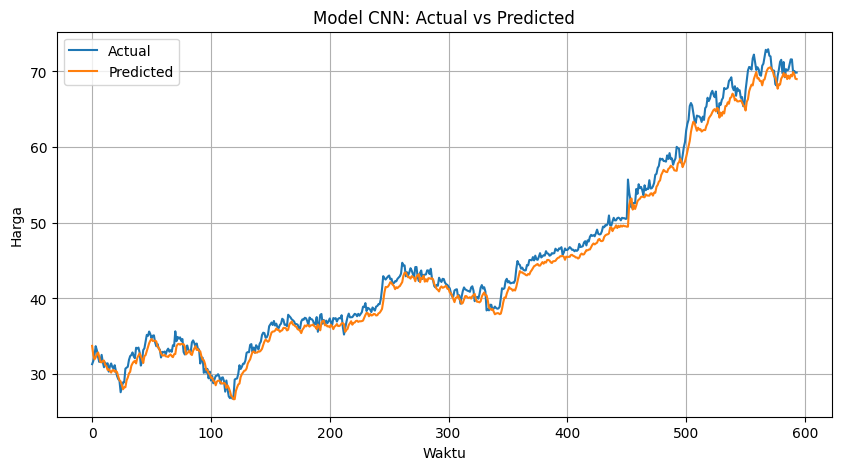

In [24]:
def plot_predictions(model, name):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(prediction, label='Predicted')
    plt.title(f"Model {name}: Actual vs Predicted")
    plt.xlabel("Waktu")
    plt.ylabel("Harga")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(model_lstm, "LSTM")
plot_predictions(model_rnn, "RNN")
plot_predictions(model_gru, "GRU")
plot_predictions(model_cnn, "CNN")
